In [1]:
import ROOT as r
import numpy as np
import math

Welcome to JupyROOT 6.22/00


In [2]:
inf = r.TFile("data_histograms.root")
inf.ls()

TFile**		data_histograms.root	
 TFile*		data_histograms.root	
  KEY: TH1F	invmass2e2u;1	invmass2e2u
  KEY: TH1F	invmass4u;1	invmass4u
  KEY: TH1F	invmass4eB;1	invmass4eB


In [3]:
c = r.TCanvas('c1','c1',800,600)

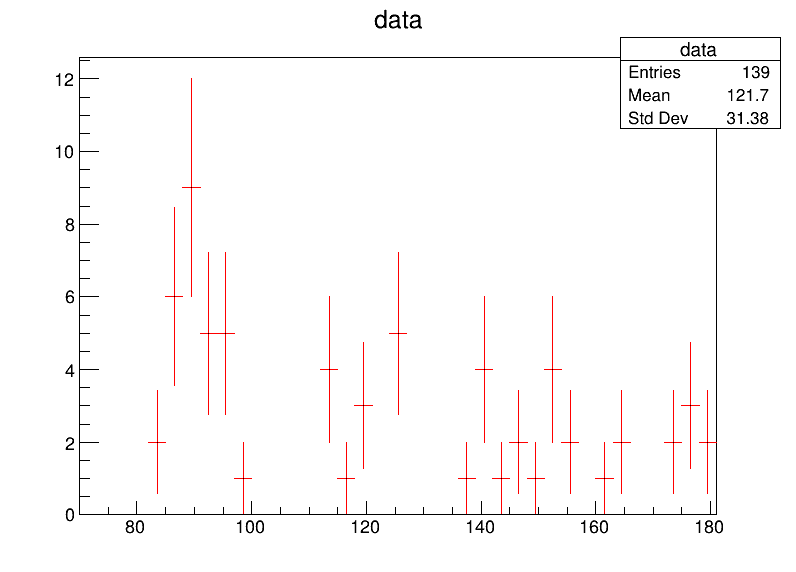

In [4]:
h_data = r.TH1F('data','data',37,70,181)
h_data.SetFillColor(0)
h_data.SetLineColor(r.kRed)
h_data.Sumw2()
h_data.Add(inf.Get('invmass4u'))
h_data.Add(inf.Get('invmass4eB'))
h_data.Add(inf.Get('invmass2e2u'))
h_data.Draw()
c.Update()
c.Draw()

In [5]:
outf = r.TFile.Open('finalgraphs.root','RECREATE')
outf.cd()
h_data.Write()

738

In [6]:
inf = r.TFile("simu_histograms.root")
inf.ls()

TFile**		simu_histograms.root	
 TFile*		simu_histograms.root	
  KEY: TH1F	ZZto4mu;1	ZZto4mu
  KEY: TH1F	ZZto4e;1	ZZto4e
  KEY: TH1F	ZZto2e2mu;1	ZZto2e2mu
  KEY: TH1F	DYJets;1	DYJets
  KEY: TH1F	Higgs;1	Higgs


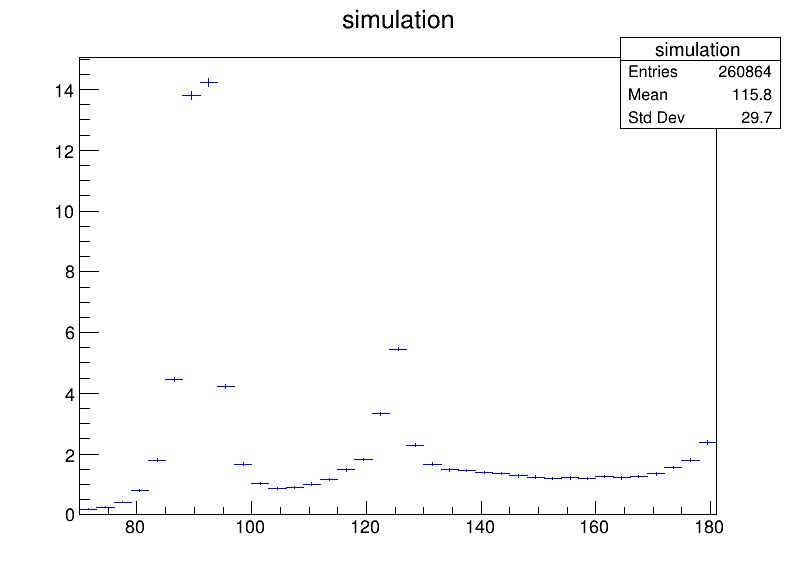

In [7]:
h_simu = r.TH1F('simulation','simulation',37,70,181)
h_simu.Sumw2()
h_simu.SetFillColor(0)
h_simu.SetLineColor(r.kBlue)
h_simu.Add(inf.Get('ZZto4mu'))
h_simu.Add(inf.Get('ZZto4e'))
h_simu.Add(inf.Get('ZZto2e2mu'))
h_simu.Add(inf.Get('Higgs'))
#h_simu.Add(inf.Get('DYJets'))
h_simu.Draw()
c.Update()
c.Draw()

In [8]:
outf.cd()
h_simu.Write()
outf.Close()

In [9]:
inf = r.TFile('finalgraphs.root')
h_simu = inf.Get('simulation')
h_data = inf.Get('data')
r.gStyle.SetOptStat(0)
h_simu.GetYaxis().SetTitle('Events/3GeV')
h_simu.GetXaxis().SetTitle('M_{4l}[GeV]')
h_simu.SetTitle('')
leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(h_simu,'simulation')
leg.AddEntry(h_data,'data')

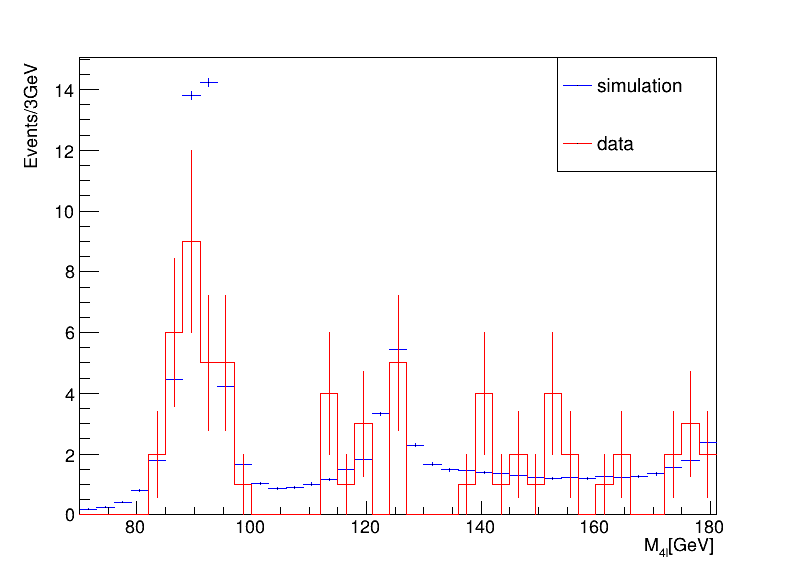

In [10]:
h_simu.Draw()
h_data.Draw('same hist;e')
leg.Draw("same")
c.Update()
c.Draw()